## Using RNNs to classify sentiment on IMDB data

I will train three types of RNNs:  "vanilla" RNN, LSTM and GRU to predict the sentiment on IMDB reviews.  

Keras provides a convenient interface to load the data and immediately encode the words into integers (based on the most common words).
This will save you a lot of the drudgery that is usually involved when working with raw text.

The IMDB is  data consists of 25000 training sequences and 25000 test sequences.
The outcome is binary (positive/negative) and both outcomes are equally represented in both the training and the test set.



In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence


(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 2000)

1- Use the `imdb.load_data()` to load in the data

2- Specify the maximum length of a sequence to 30 words and the pick the 2000 most common words.

In [ ]:
print("Number of Sequence in training set:", X_train.shape[0])
print("Number of Sequence in testing set:", X_test.shape[0])

Number of Sequence in training set: 25000
Number of Sequence in testing set: 25000


3- Check that the number of sequences in train and test datasets are equal (default split):
    
Expected output:
- `x_train = 25000 train sequences`

- `x_test = 25000 test sequences`

In [ ]:
max_length = 30
X_train = sequence.pad_sequences(X_train, maxlen = max_length)
X_test = sequence.pad_sequences(X_test, maxlen = max_length)

4- Pad (or truncate) the sequences so that they are of the maximum length

In [ ]:
print("Shape of Sequence in training set:", X_train.shape)
print("Shape of Sequence in testing set:", X_test.shape)

Shape of Sequence in training set: (25000, 30)
Shape of Sequence in testing set: (25000, 30)


5- After padding or truncating, check the dimensionality of x_train and x_test.

Expected output:
- `x_train shape: (25000, 30)`
- `x_test shape: (25000, 30)`

## Keras layers for (Vanilla) RNNs

In this step, you will not use pre-trained word vectors, Instead you will learn an embedding as part of the  the Vanilla) RNNs network  Neural Network.

In the Keras API documentation, the Embedding Layer and the SimpleRNN Layer have the following syntax:

### Embedding Layer
`keras.layers.embeddings.Embedding(input_dim, output_dim, embeddings_initializer='uniform', embeddings_regularizer=None, activity_regularizer=None, embeddings_constraint=None, mask_zero=False, input_length=None)`

- This layer maps each integer into a distinct (dense) word vector of length `output_dim`.
- Can think of this as learning a word vector embedding "on the fly" rather than using an existing mapping (like GloVe)
- The `input_dim` should be the size of the vocabulary.
- The `input_length` specifies the length of the sequences that the network expects.

### SimpleRNN Layer
`keras.layers.recurrent.SimpleRNN(units, activation='tanh', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0)`

- This is the basic RNN, where the output is also fed back as the "hidden state" to the next iteration.
- The parameter `units` gives the dimensionality of the output (and therefore the hidden state).  Note that typically there will be another layer after the RNN mapping the (RNN) output to the network output.  So we should think of this value as the desired dimensionality of the hidden state and not necessarily the desired output of the network.
- Recall that there are two sets of weights, one for the "recurrent" phase and the other for the "kernel" phase.  These can be configured separately in terms of their initialization, regularization, etc.


In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import SimpleRNN, Embedding, Dense

model = Sequential()

model.add(Embedding(input_dim = 2000, output_dim = 50, input_length = 30))
model.add(SimpleRNN(5, kernel_initializer = tf.keras.initializers.RandomNormal(stddev = 0.001)))
model.add(Dense(1, activation='sigmoid'))


7- How many parameters have the embedding layer?

In [ ]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 30, 50)            100000    
                                                                 
 simple_rnn_19 (SimpleRNN)   (None, 5)                 280       
                                                                 
 dense_14 (Dense)            (None, 1)                 6         
                                                                 
Total params: 100286 (391.74 KB)
Trainable params: 100286 (391.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


8- Train the network with the RMSprop with learning rate of .0001 and epochs=10.

In [ ]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.0001),loss = 'binary_crossentropy',metrics = ['accuracy'])
result = model.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
782/782 [==============================] - 11s 13ms/step - loss: 0.4287 - accuracy: 0.8109 - val_loss: 0.4816 - val_accuracy: 0.7674
Epoch 2/10
782/782 [==============================] - 9s 12ms/step - loss: 0.4233 - accuracy: 0.8144 - val_loss: 0.4822 - val_accuracy: 0.7699
Epoch 3/10
782/782 [==============================] - 10s 13ms/step - loss: 0.4185 - accuracy: 0.8161 - val_loss: 0.4806 - val_accuracy: 0.7698
Epoch 4/10
782/782 [==============================] - 13s 17ms/step - loss: 0.4148 - accuracy: 0.8202 - val_loss: 0.4800 - val_accuracy: 0.7712
Epoch 5/10
782/782 [==============================] - 17s 22ms/step - loss: 0.4117 - accuracy: 0.8210 - val_loss: 0.4801 - val_accuracy: 0.7726
Epoch 6/10
782/782 [==============================] - 9s 12ms/step - loss: 0.4086 - accuracy: 0.8232 - val_loss: 0.4809 - val_accuracy: 0.7717
Epoch 7/10
782/782 [==============================] - 10s 13ms/step - loss: 0.4059 - accuracy: 0.8250 - val_loss: 0.4875 - val_accuracy: 0

9- PLot the loss and accuracy metrics during the training and interpret the result.

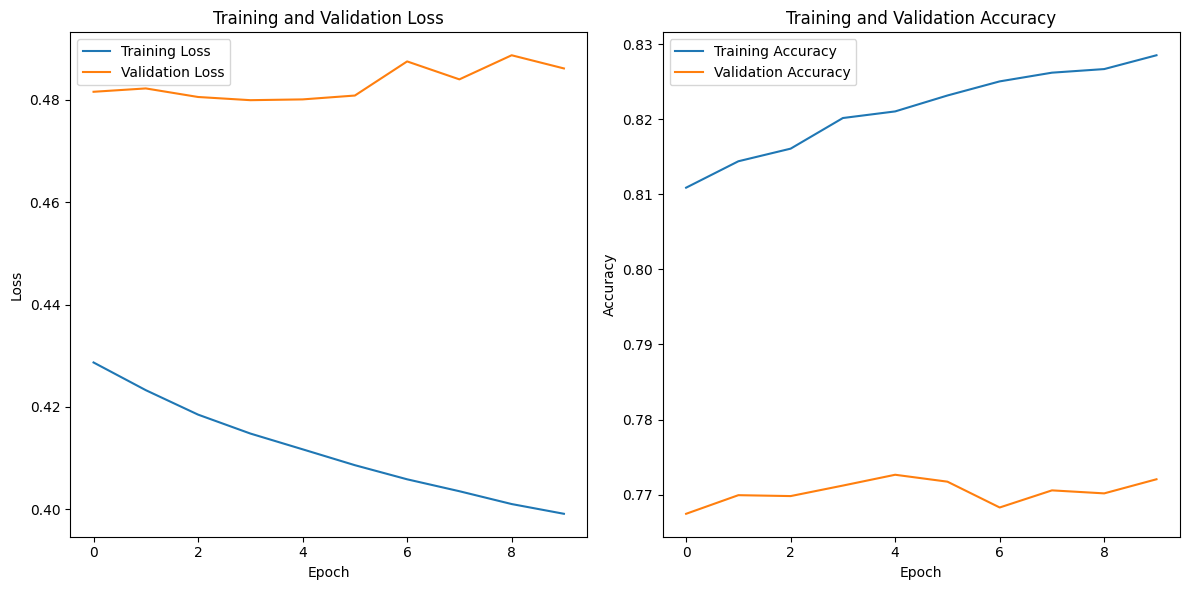

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(result.history['loss'], label='Training Loss')
plt.plot(result.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')

plt.legend()

plt.subplot(1, 2, 2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(result.history['accuracy'], label='Training Accuracy')
plt.plot(result.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')

plt.legend()


plt.tight_layout()
plt.show()

10- Check the accuracy and the loss of your models on the test dataset.

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

782/782 [==============================] - 3s 4ms/step - loss: 0.4862 - accuracy: 0.7720
Test Loss: 0.48615333437919617
Test Accuracy: 0.7720400094985962


## Tuning The Vanilla RNN Network

11- Prepare the data to use sequences of length 80 rather than length 30 and retrain your model.  Did it improve the performance?

12- Try different values of the  maximum length of a sequence ("max_features").  Can you improve the performance?

13- Try smaller and larger sizes of the RNN hidden dimension.  How does it affect the model performance?  How does it affect the run time?

In [ ]:
sequence_length = 80
X_train = sequence.pad_sequences(X_train, maxlen=sequence_length)
X_test = sequence.pad_sequences(X_test, maxlen=sequence_length)

In [ ]:
model = Sequential()
model.add(Embedding(input_dim = 2000, output_dim = 50, input_length = sequence_length))
model.add(SimpleRNN(5, kernel_initializer = tf.keras.initializers.RandomNormal(stddev = 0.001)))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])
sequence_80_result = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 18s 25ms/step - loss: 0.6931 - accuracy: 0.4958 - val_loss: 0.6931 - val_accuracy: 0.4990
Epoch 2/10
625/625 [==============================] - 14s 22ms/step - loss: 0.6928 - accuracy: 0.5224 - val_loss: 0.6931 - val_accuracy: 0.4988
Epoch 3/10
625/625 [==============================] - 14s 22ms/step - loss: 0.6918 - accuracy: 0.5312 - val_loss: 0.6931 - val_accuracy: 0.5042
Epoch 4/10
625/625 [==============================] - 12s 19ms/step - loss: 0.6891 - accuracy: 0.5406 - val_loss: 0.6938 - val_accuracy: 0.5036
Epoch 5/10
625/625 [==============================] - 13s 20ms/step - loss: 0.6840 - accuracy: 0.5591 - val_loss: 0.6982 - val_accuracy: 0.5170
Epoch 6/10
625/625 [==============================] - 13s 21ms/step - loss: 0.6769 - accuracy: 0.5810 - val_loss: 0.7009 - val_accuracy: 0.5112
Epoch 7/10
625/625 [==============================] - 13s 20ms/step - loss: 0.6699 - accuracy: 0.5985 - val_loss: 0.7070 - val_accuracy:

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss (Seq Length 80):", test_loss)
print("Test Accuracy (Seq Length 80):", test_accuracy)

782/782 [==============================] - 6s 8ms/step - loss: 0.7183 - accuracy: 0.5093
Test Loss (Seq Length 80): 0.7183306813240051
Test Accuracy (Seq Length 80): 0.5093200206756592


Compared to sequence length is 30, sequence length with 80 is much worse than it.So it did not improve the performance

In [ ]:

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 5000)


sequence_length = 80
X_train_ = sequence.pad_sequences(X_train, maxlen=sequence_length)
X_test = sequence.pad_sequences(X_test, maxlen=sequence_length)



model = Sequential()
model.add(Embedding(input_dim = 5000, output_dim = 50, input_length = sequence_length))
model.add(SimpleRNN(5, kernel_initializer = tf.keras.initializers.RandomNormal(stddev = 0.001)))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.0001),loss = 'binary_crossentropy',metrics = ['accuracy'])

num_words_5000_result = model.fit(X_train, y_train, epochs = 10, validation_split = 0.2)


test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss (vocab_size={5000}): {test_loss}")
print(f"Test Accuracy (vocab_size={5000}): {test_accuracy}")

Epoch 1/10
625/625 [==============================] - 17s 25ms/step - loss: 0.6799 - accuracy: 0.5777 - val_loss: 0.6565 - val_accuracy: 0.6490
Epoch 2/10
625/625 [==============================] - 14s 22ms/step - loss: 0.6438 - accuracy: 0.6707 - val_loss: 0.6346 - val_accuracy: 0.6882
Epoch 3/10
625/625 [==============================] - 17s 27ms/step - loss: 0.6188 - accuracy: 0.7136 - val_loss: 0.6202 - val_accuracy: 0.6996
Epoch 4/10
625/625 [==============================] - 27s 43ms/step - loss: 0.5960 - accuracy: 0.7406 - val_loss: 0.5953 - val_accuracy: 0.7326
Epoch 5/10
625/625 [==============================] - 25s 40ms/step - loss: 0.5740 - accuracy: 0.7613 - val_loss: 0.5856 - val_accuracy: 0.7302
Epoch 6/10
625/625 [==============================] - 15s 25ms/step - loss: 0.5536 - accuracy: 0.7755 - val_loss: 0.5671 - val_accuracy: 0.7504
Epoch 7/10
625/625 [==============================] - 13s 21ms/step - loss: 0.5310 - accuracy: 0.7919 - val_loss: 0.5529 - val_accuracy:

Seems like if you increase the num_words to 5000, the performance did not get better.

In [ ]:
vocab_size = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)


sequence_length = 80
X_train_padded = sequence.pad_sequences(X_train, maxlen = sequence_length)
X_test_padded = sequence.pad_sequences(X_test, maxlen = sequence_length)

hidden_dimensions = [2, 10, 20]

for hidden_dim in hidden_dimensions:


    model = Sequential()
    model.add(Embedding(input_dim = vocab_size, output_dim = 50, input_length = sequence_length))
    model.add(SimpleRNN(hidden_dim, kernel_initializer = tf.keras.initializers.RandomNormal(stddev = 0.001)))
    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate = 0.0001),loss='binary_crossentropy',metrics=['accuracy'])

    history = model.fit(X_train_padded, y_train, epochs=10, validation_split = 0.2)

    test_loss, test_accuracy = model.evaluate(X_test_padded, y_test)

    print(f"Test Loss (Hidden Dim={hidden_dim}): {test_loss}")
    print(f"Test Accuracy (Hidden Dim={hidden_dim}): {test_accuracy}")

Epoch 1/10
625/625 [==============================] - 15s 22ms/step - loss: 0.6931 - accuracy: 0.5100 - val_loss: 0.6931 - val_accuracy: 0.5024
Epoch 2/10
625/625 [==============================] - 13s 21ms/step - loss: 0.6923 - accuracy: 0.5255 - val_loss: 0.6929 - val_accuracy: 0.5066
Epoch 3/10
625/625 [==============================] - 13s 21ms/step - loss: 0.6899 - accuracy: 0.5370 - val_loss: 0.6930 - val_accuracy: 0.5240
Epoch 4/10
625/625 [==============================] - 14s 22ms/step - loss: 0.6839 - accuracy: 0.5610 - val_loss: 0.6947 - val_accuracy: 0.5212
Epoch 5/10
625/625 [==============================] - 13s 22ms/step - loss: 0.6735 - accuracy: 0.5899 - val_loss: 0.6989 - val_accuracy: 0.5174
Epoch 6/10
625/625 [==============================] - 14s 22ms/step - loss: 0.6603 - accuracy: 0.6189 - val_loss: 0.7033 - val_accuracy: 0.5222
Epoch 7/10
625/625 [==============================] - 14s 22ms/step - loss: 0.6473 - accuracy: 0.6434 - val_loss: 0.7063 - val_accuracy:

Seems like the higher hidden dimension we have, the higher accuracy we got from it.

## Train LSTM and GRU networks

14- Build LSTM and GRU networks and compare their performance (accuracy and execution time) with the SimpleRNN. What is your conclusion?

In [ ]:
import time
from tensorflow.keras.layers import LSTM, GRU

recurrent_layers = {
    'SimpleRNN': SimpleRNN(5, kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.001)),
    'LSTM': LSTM(5, kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.001)),
    'GRU': GRU(5, kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.001))
}


for layer_name, layer in recurrent_layers.items():
    print(f"\nTraining and evaluating {layer_name} model")

    model = Sequential()
    model.add(Embedding(input_dim = vocab_size, output_dim = 50, input_length = sequence_length))
    model.add(layer)
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.0001),loss = 'binary_crossentropy',metrics = ['accuracy'])

    start_time = time.time()
    history = model.fit(X_train_padded, y_train, epochs = 10, validation_split = 0.2)
    end_time = time.time()

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test_padded, y_test)

    print(f"Test Loss ({layer_name}): {test_loss}")
    print(f"Test Accuracy ({layer_name}): {test_accuracy}")
    print(f"Execution Time ({layer_name}): {end_time - start_time} seconds\n")


Training and evaluating SimpleRNN model
Epoch 1/10
625/625 [==============================] - 24s 34ms/step - loss: 0.6931 - accuracy: 0.5048 - val_loss: 0.6927 - val_accuracy: 0.5272
Epoch 2/10
625/625 [==============================] - 26s 41ms/step - loss: 0.6921 - accuracy: 0.5244 - val_loss: 0.6918 - val_accuracy: 0.5278
Epoch 3/10
625/625 [==============================] - 14s 22ms/step - loss: 0.6894 - accuracy: 0.5400 - val_loss: 0.6907 - val_accuracy: 0.5302
Epoch 4/10
625/625 [==============================] - 13s 21ms/step - loss: 0.6825 - accuracy: 0.5636 - val_loss: 0.6924 - val_accuracy: 0.5282
Epoch 5/10
625/625 [==============================] - 14s 22ms/step - loss: 0.6701 - accuracy: 0.5954 - val_loss: 0.6963 - val_accuracy: 0.5276
Epoch 6/10
625/625 [==============================] - 14s 22ms/step - loss: 0.6537 - accuracy: 0.6231 - val_loss: 0.7022 - val_accuracy: 0.5316
Epoch 7/10
625/625 [==============================] - 13s 21ms/step - loss: 0.6360 - accuracy: 

Looks like GRU has the best performance, comapred to SimpleRnn and LSTM